# Visualization of San-Francisco Incidents in Summer 2014

Given the dataset of San Francisco incidents in Summer 2014 I want to answer the following questions:
* Which category of incidents occur most often?
* How do incidents of that category vary by police district?
* How do incidents of that category vary by time of day? At what time are they most common?

First I read the data from the github and see what it looks like.

In [115]:
require(ggplot2)

print("Reading data...")
sf = read.csv("https://github.com/uwescience/datasci_course_materials/raw/master/assignment6/sanfrancisco_incidents_summer_2014.csv")
print("Done")

head(sf, n=3)

[1] "Reading data..."
[1] "Done"


IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.4056,37.73832,"(37.7383221869053, -122.405646994567)",1.407343e+13
140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.4350,37.76177,"(37.7617677182954, -122.435012093789)",1.407363e+13
146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.4098,37.78004,"(37.7800356268394, -122.409795194505)",1.461779e+13


Now I am going to count incidents by category, and compare the results visually.

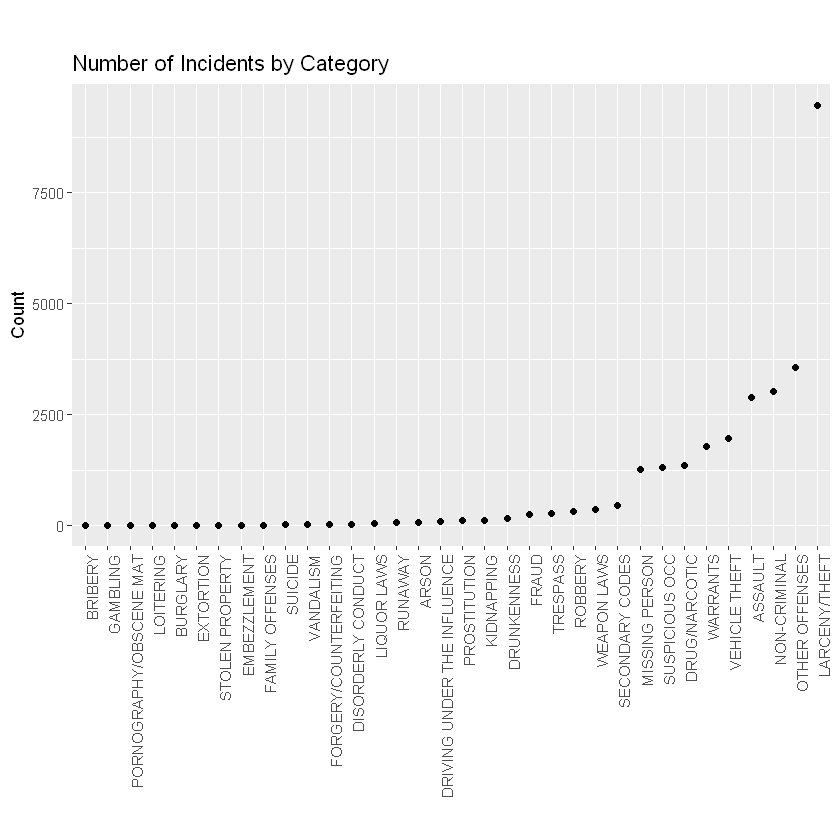

In [116]:
cc = data.frame(summary(sf$Category))
ggplot(cc, aes(reorder(rownames(cc),cc[[1]]), cc[[1]])) + 
    geom_point() +
    xlab(NULL) +
    ylab("Count") +
    ggtitle("Number of Incidents by Category") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    coord_fixed(ratio=0.002)

As is clearly seen from the above plot, LARCENY/THEFT category is leading. 

**Of all the incidents LARCENY/THEFT occur most commonly.**

And now let's see how LARCENY/THEFT incidents vary by police district.

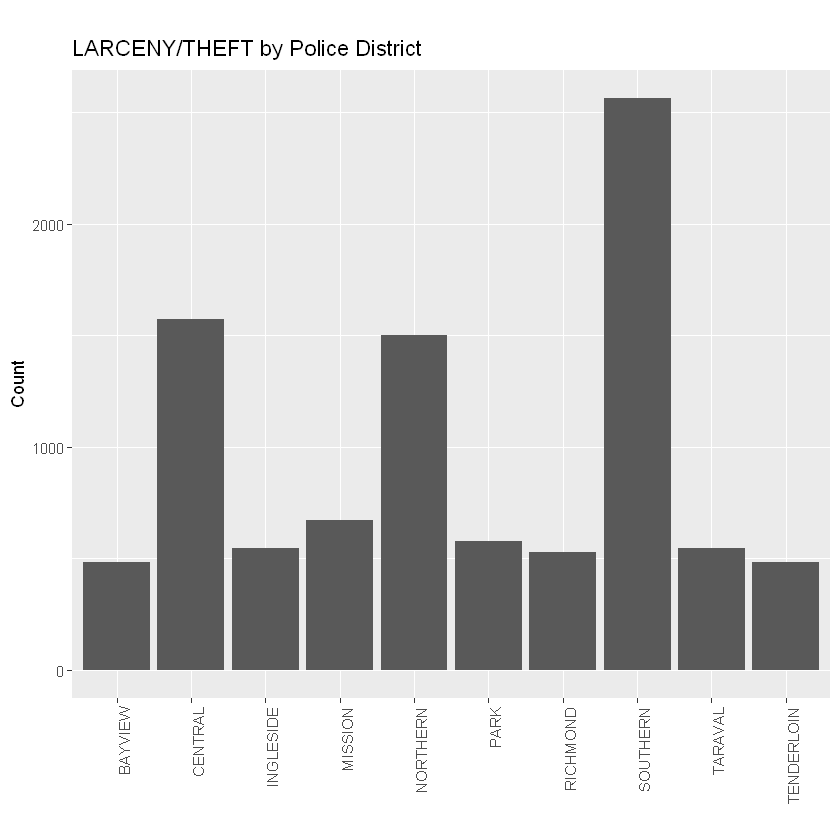

In [117]:
larceny = sf[sf$Category=="LARCENY/THEFT",]
ggplot(larceny, aes(PdDistrict)) + 
    geom_bar() +
    xlab(NULL) +
    ylab("Count") +
    ggtitle("LARCENY/THEFT by Police District") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    coord_fixed(ratio=0.003)

**Of all the police districts the SOUTHERN district contributed the most to LARCENY/THEFT incidents.**

Now when I know where in San Francisco thefts occur most commonly, I want to find out at what time of day they occur most commonly. So I am going to see how LARCENY/THEFT vary by time of day.

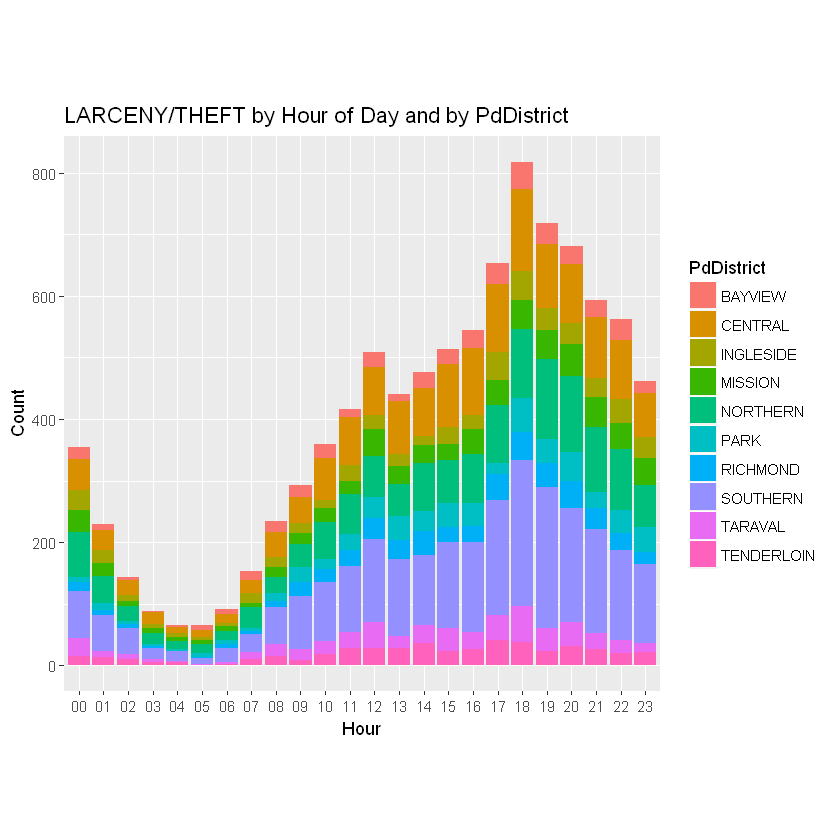

In [118]:
hh24 = function(t) substr(t, 1, 2)
ggplot(larceny, aes(hh24(Time), fill=PdDistrict)) + 
    geom_bar() +
    xlab("Hour") +
    ylab("Count") +
    ggtitle("LARCENY/THEFT by Hour of Day and by PdDistrict") +
    coord_fixed(ratio=0.025)

As the plot shows **LARCENY/THEFT incidents most commonly occur in the afternoon, and 18 PM is the peak hour.**

Additionally, for each bar in the plot we can see how much each police district contributes to the total number of incidents. It's no surprise the SOUTHERN contributes the most.